In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time

In [3]:
movies=pd.read_csv('Data/MovieSummaries/movie.metadata.tsv',sep='\t',header=None)
movies.columns=['wiki_movie_ID','freebase_movie_ID','movie_name','movie_release_date','movie_box_off_rev','movie_runtime','movie_languages','movie_countries','movie_genres']
movies.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [96]:
movies.sort_values(by='movie_release_date', ascending=False).head(20)

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,nb_genres
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Action, Romance Film]",4
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Horror]",2
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016,NaN,NaN,{},{},[],0
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Science Fiction, Action, Fantasy, Adventure]",4
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},[Science Fiction],1
40166,2312141,/m/072zwn,Knight Rider: The Movie,2015,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","[Crime Fiction, Science Fiction, Action]",3
53855,32416903,/m/0gys9tc,Total Dhamaal,2015,NaN,138.0,"{""/m/03k50"": ""Hindi Language""}",{},[Comedy film],1
70978,6009939,/m/0fkf28,Interstellar,2014,NaN,NaN,"{""/m/02h40lc"": ""English Language""}",{},[Science Fiction],1
70871,36351451,/m/0k3p3fy,The Elder,2014,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}",[Adventure],1
36528,5803355,/m/0f5r4p,Voltron,2014,NaN,NaN,"{""/m/02h40lc"": ""English Language""}",{},"[Action, Fantasy, Adventure]",3


We will first transform the dictionnary in list to be easier to manipulate for later analysis

In [4]:
# Split the different genre in each dictionnary of each row into several columns
movies_copy = movies
movies_copy['movie_genres'] = movies['movie_genres'].map(eval).apply(lambda x: list(x.values()))
movies_copy.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama]


Here we will add a count of genre by row to see how many genres each movies has.

In [5]:
movies_copy['nb_genres'] = movies_copy['movie_genres'].str.len()
movies_copy.head(20)

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,nb_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...",7
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]",4
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]",2
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri...",3
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama],1
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","[Short Film, Silent film, Indie, Black-and-whi...",5
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","[Family Film, Fantasy, Adventure, World cinema]",4
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]",3
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","[Musical, Drama, Comedy]",3
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Horror, Supernatural]",2


In [6]:
movies_copy['nb_genres'].describe()

count    81741.000000
mean         2.976829
std          2.107219
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: nb_genres, dtype: float64

<AxesSubplot: >

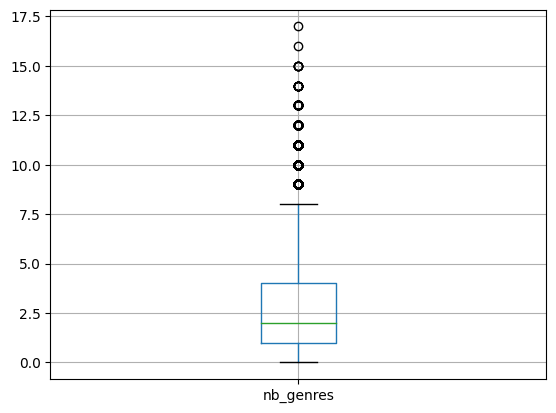

In [7]:
movies_copy.boxplot(['nb_genres'])

With the boxplots and the stats of the new column "nb_genres", we notice that there are sometimes 17 genres for one movie which is way to much. But most of the movies (75%) have between 1 and 4 genres which is more reasonable. Maybe eliminate outliers could be a good ideas or do something else ?

In [9]:
total_genres = pd.DataFrame(movies_copy.movie_genres.explode().dropna().value_counts())
total_genres

,movie_genres
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
...,...
Romantic thriller,1
Comdedy,1
C-Movie,1
Silhouette animation,1


<AxesSubplot: >

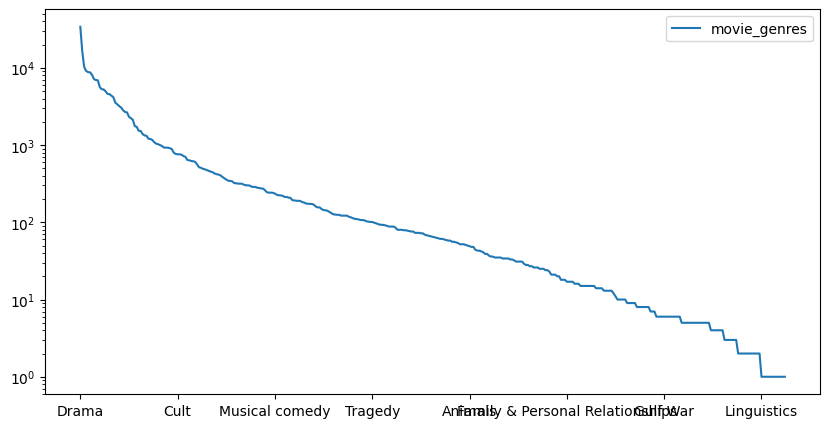

In [10]:
total_genres.plot(logy = True, figsize= (10,5))

In [42]:
total_genres.index.name = "Genres"
total_genres = total_genres.rename(columns = {'movie_genres': 'Total'})
total_genres.head(20)


,Total
Genres,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
Thriller,8744
Short Film,8141
World cinema,7155
Crime Fiction,6948


Here we see that the number of films by genre decreasing almost exponentially. This is due to cross genre movies "Romantic Thriller" or typo like "Comdedy". There are also a lot of "Genres" which are not strict genres like "silent movie" or "black and white".

In [12]:
# Attention, some of there is wrong release date in dataset: here 1010 instead of 2010
movies_copy.iloc[62836]


wiki_movie_ID                                                  29666067
freebase_movie_ID                                            /m/0fphzrf
movie_name                                               Hunting Season
movie_release_date                                           1010-12-02
movie_box_off_rev                                            12160978.0
movie_runtime                                                     140.0
movie_languages       {"/m/02hwyss": "Turkish Language", "/m/02h40lc...
movie_countries                                 {"/m/01znc_": "Turkey"}
movie_genres                  [Crime Fiction, Mystery, Drama, Thriller]
nb_genres                                                             4
Name: 62836, dtype: object

In [53]:
movies_copy.loc[62836, 'movie_release_date'] = '2010-12-02'
#movies_copy['movie_release_date'] = pd.to_datetime(movies_copy['movie_release_date'])
movies_per_year = movies_copy
movies_per_year['movie_release_date'] = movies_per_year['movie_release_date'].str[:4]
movies_per_year.sort_values(by = 'movie_release_date', ascending = False).head()


,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,nb_genres
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Action, Romance Film]",4
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Horror]",2
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016,NaN,NaN,{},{},[],0
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Science Fiction, Action, Fantasy, Adventure]",4
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},[Science Fiction],1


In [57]:
total_genres_per_year = total_genres
movies_per_year_grouped = movies_per_year.groupby(movies_per_year['movie_release_date'])
years = ['Total']
for year, group in movies_per_year_grouped[['movie_release_date', 'movie_genres']]:
    total_genres_per_year =pd.concat([total_genres_per_year,group.movie_genres.explode().dropna().value_counts()], axis = 1)
    years.append(year)
total_genres_per_year.columns = years
total_genres_per_year.index.name = 'Genres'
total_genres_per_year.head(20)


,Total,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genres,,,,,,,,,,,,,,,,,,,,,
Drama,34007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1013.0,985.0,966.0,902.0,842.0,427.0,45.0,4.0,NaN,NaN
Comedy,16349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,496.0,512.0,444.0,393.0,267.0,98.0,10.0,1.0,NaN,NaN
Romance Film,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,332.0,349.0,320.0,283.0,261.0,172.0,13.0,3.0,NaN,1.0
Black-and-white,9094,1.0,1.0,NaN,NaN,NaN,1.0,7.0,11.0,19.0,...,3.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Action,8798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,239.0,286.0,269.0,287.0,294.0,187.0,44.0,1.0,2.0,1.0
Thriller,8744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,382.0,375.0,397.0,340.0,281.0,172.0,41.0,1.0,NaN,2.0
Short Film,8141,1.0,1.0,1.0,3.0,3.0,1.0,9.0,18.0,43.0,...,149.0,146.0,147.0,137.0,94.0,38.0,1.0,NaN,NaN,NaN
World cinema,7155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,369.0,398.0,393.0,275.0,44.0,4.0,NaN,NaN,NaN,NaN
Crime Fiction,6948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.0,175.0,195.0,156.0,135.0,60.0,17.0,NaN,1.0,NaN


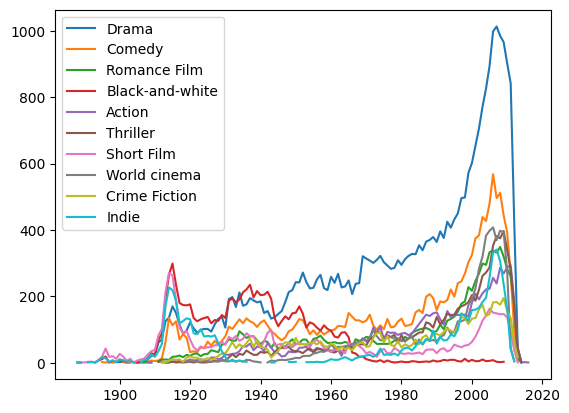

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
x = np.array(total_genres_per_year.columns[1:], dtype = 'datetime64[ms]')
plt.figure()
for index, row in total_genres_per_year.head(10).iterrows():
    plt.plot(x, row[1:], label = index)
plt.legend()
plt.show()

By looking at the number of genre per year, we see a evolution almost identic for every genres (they are all increasing quickly) except for "black and white" movies. Hover, suprinsingly, they all drop around 2015.

<AxesSubplot: xlabel='movie_release_date'>

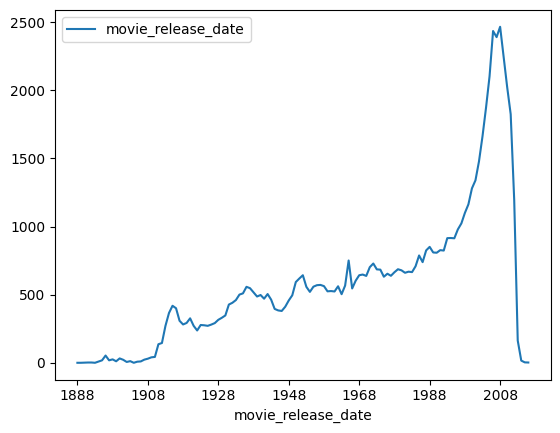

In [90]:
movies_per_year_grouped[['movie_release_date']].count().plot()

In [95]:
movies_per_year_grouped[['movie_release_date']].size().reset_index(name='counts').sort_values(by = 'movie_release_date', ascending= False).head(20)

,movie_release_date,counts
128,2016,3
127,2015,4
126,2014,17
125,2013,164
124,2012,1194
123,2011,1824
122,2010,2023
121,2009,2247
120,2008,2465
119,2007,2389


As we can see here, this is due to the incompletness of the dataset. It's totally wrong after 2012. We should do something about that